### CRISP-DM

#### 1. Business Understanding

**Objective:** Develop a machine learning model to detect whether a person is wearing a mask or not using images. This model can be used in various applications such as ensuring compliance with mask-wearing policies in public places.

**Success Criteria:**

- Achieve a high accuracy (e.g., >90%) on the test dataset.
- The model should be able to generalize well to new, unseen images.

#### 2. Data Understanding

**Data Collection:**

- The dataset consists of images of people with and without masks.
- The dataset is already divided into training, validation, and test sets.

**Data Description:**

- Images are in JPEG format.
- Each image is labeled as either "Mask" or "No Mask".

#### 3. Data Preparation
**Data Preprocessing:**

- Resize images to 224x224 pixels to match the input size of the VGG16 model.
- Normalize pixel values to the range [0, 1].
**Data Augmentation:**

- Apply data augmentation techniques such as rotation, zoom, and horizontal flip to increase the diversity of the training data.
**Data Generators:**

- Use `ImageDataGenerator` to create training, validation, and test data generators.
#### 4. Modeling
**Model Selection:**

- Use a pretrained VGG16 model for transfer learning.
- Add custom layers on top of the VGG16 base model for binary classification.

**Model Training:**

- Compile the model with an appropriate optimizer (e.g., Adam) and loss function (e.g., binary crossentropy).
- Train the model using the training data and validate it using the validation data.

**Hyperparameter Tuning:**

- Experiment with different learning rates, batch sizes, and number of epochs to find the best hyperparameters.

#### 5. Evaluation

**Model Evaluation:**

- Evaluate the model on the test dataset to measure its performance.
- Use metrics such as accuracy, precision, recall, and F1-score.

**Visual Inspection:**

- Display a few test images along with their predicted and actual labels to visually inspect the model's performance.

#### 6. Deployment

**Model Saving:**

- Save the trained model to a file (e.g., `mask_detection_vgg16.h5`).

**Model Deployment:**

- Deploy the model to a production environment where it can be used to make predictions on new images.
- Provide an interface (e.g., a web application) for users to upload images and get predictions.

**Monitoring and Maintenance:**

- Monitor the model's performance in the production environment.
- Retrain the model periodically with new data to maintain its accuracy.

### Imort Required Libraries

In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

### Load and Preprocess the Data

In [7]:
train_dir = '/Users/young/Documents/IoT-data-analysis-and-application/HW6/HW6-1/dataset/train'
valid_dir = '/Users/young/Documents/IoT-data-analysis-and-application/HW6/HW6-1/dataset/valid'
test_dir = '/Users/young/Documents/IoT-data-analysis-and-application/HW6/HW6-1/dataset/test'

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 4296 images belonging to 2 classes.
Found 300 images belonging to 2 classes.
Found 74 images belonging to 2 classes.


### Load the Pretrained VGG16 Model

In [8]:
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of VGG16
for layer in vgg16_base.layers:
    layer.trainable = False

### Build the Model

In [9]:
model = Sequential([
    vgg16_base,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

### Train the Model

In [10]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // valid_generator.batch_size,
    epochs=10
)

/Users/young/Documents/IoT-data-analysis-and-application/HW6_venv/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
 33/134 ━━━━━━━━━━━━━━━━━━━━ 5:41 3s/step - accuracy: 0.6760 - loss: 0.6360

/Users/young/Documents/IoT-data-analysis-and-application/HW6_venv/lib/python3.10/site-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


134/134 ━━━━━━━━━━━━━━━━━━━━ 540s 4s/step - accuracy: 0.8401 - loss: 0.3490 - val_accuracy: 0.9826 - val_loss: 0.0672
Epoch 2/10
  1/134 ━━━━━━━━━━━━━━━━━━━━ 8:45 4s/step - accuracy: 0.9688 - loss: 0.0674

/Users/young/Documents/IoT-data-analysis-and-application/HW6_venv/lib/python3.10/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


134/134 ━━━━━━━━━━━━━━━━━━━━ 39s 264ms/step - accuracy: 0.9688 - loss: 0.0674 - val_accuracy: 0.9722 - val_loss: 0.0713
Epoch 3/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 600s 4s/step - accuracy: 0.9810 - loss: 0.0652 - val_accuracy: 0.9826 - val_loss: 0.0462
Epoch 4/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 39s 263ms/step - accuracy: 1.0000 - loss: 0.0282 - val_accuracy: 0.9826 - val_loss: 0.0471
Epoch 5/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 520s 4s/step - accuracy: 0.9954 - loss: 0.0255 - val_accuracy: 0.9861 - val_loss: 0.0355
Epoch 6/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 35s 238ms/step - accuracy: 0.9688 - loss: 0.0861 - val_accuracy: 0.9931 - val_loss: 0.0220
Epoch 7/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 510s 4s/step - accuracy: 0.9955 - loss: 0.0228 - val_accuracy: 0.9931 - val_loss: 0.0315
Epoch 8/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 35s 235ms/step - accuracy: 1.0000 - loss: 0.0059 - val_accuracy: 0.9931 - val_loss: 0.0296
Epoch 9/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 533s 4s/step - accuracy: 0.9975 - loss: 0.0134 - val_accurac

### Evaluate the Model

In [11]:
loss, accuracy = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 4s/step - accuracy: 0.9792 - loss: 0.0884
Test Accuracy: 98.44%


### Save the Model

In [12]:
model.save('mask_detection_vgg16.h5')

### Load and Predict

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
Mask


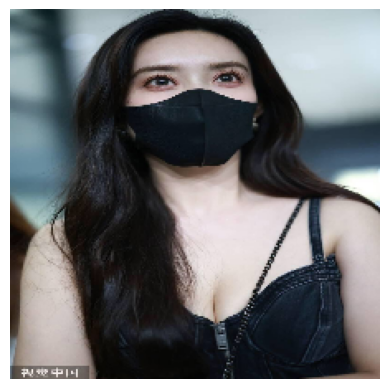

In [3]:
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras.preprocessing import image

model = load_model('mask_detection_vgg16.h5')

img_path = '/Users/young/Documents/IoT-data-analysis-and-application/HW6/HW6-1/eqzQJYw.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

prediction = model.predict(img_array)
if prediction[0] > 0.5:
    print("No Mask")
else:
    print("Mask")


plt.axis("off")
plt.imshow(img)